In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree


In [37]:
# Load the dataset
df = pd.read_csv(r'E:\ML Dataset\LP-1 Dataset\Decision Tree & Naive Bayes Classification\madfhantr.csv')

df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
# Check the data types of all columns
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [51]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [61]:
# Clean 'Dependents' column - Replace '3+' with '3'
df['Dependents'] = df['Dependents'].replace('3+', 3)

# Convert the 'Dependents' column to numeric type
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [55]:
# Check for non-numeric values in categorical columns before encoding
print("Categorical Columns - Unique Values before Encoding:")
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

# Check if there are any non-numeric values in 'Loan_Status'
print(f"Loan_Status unique values: {df['Loan_Status'].unique()}")


Categorical Columns - Unique Values before Encoding:
Gender: [1 0 2]
Married: [0 1 2]
Education: [0 1]
Self_Employed: [0 1 2]
Credit_History: [1 0 2]
Property_Area: [2 0 1]
Loan_Status: [1 0]
Loan_Status unique values: [1 0]


In [56]:
# Convert categorical columns to string before encoding
for column in categorical_columns:
    df[column] = df[column].astype(str)

# Label encode the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Check data types again after encoding
print(df.dtypes)


Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
dtype: object


In [65]:
# Clean 'Dependents' column - Replace '3+' with '3'
df['Dependents'] = df['Dependents'].replace('3+', 3)



In [66]:
# Convert the 'Dependents' column to numeric type
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [67]:
for column in categorical_columns:
    if df[column].dtype == 'object':
        print(f"Warning: {column} is still of type 'object', encoding is needed.")
    else:
        print(f"{column} is already encoded with numeric values.")

Gender is already encoded with numeric values.
Married is already encoded with numeric values.
Education is already encoded with numeric values.
Self_Employed is already encoded with numeric values.
Credit_History is already encoded with numeric values.
Property_Area is already encoded with numeric values.
Loan_Status is already encoded with numeric values.


In [68]:
X = df.drop(columns=['Loan_Status'])  # 'Loan_Status' is the target variable
y = df['Loan_Status']  # Target variable is 'Loan_Status'

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
y_pred = clf.predict(X_test)

In [72]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.6422764227642277

Confusion Matrix:
 [[23 20]
 [24 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51        43
           1       0.74      0.70      0.72        80

    accuracy                           0.64       123
   macro avg       0.61      0.62      0.61       123
weighted avg       0.65      0.64      0.65       123



Class Names for Tree Visualization: ['Not Approved', 'Approved']


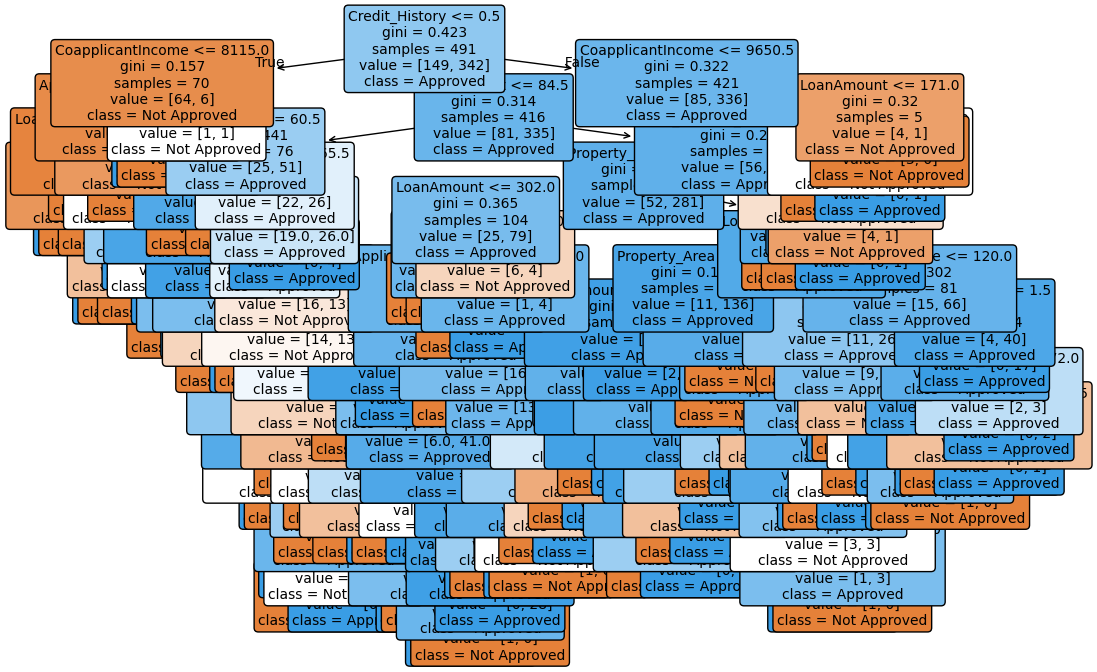

In [81]:
plt.figure(figsize=(12, 8))
# Check class names before passing them to the plot
print("Class Names for Tree Visualization:", ['Not Approved', 'Approved'])

tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Approved', 'Approved'], rounded=True, fontsize=10)
plt.show()